In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading & Reading the dataset
df = pd.read_excel('CC_expenditure.xlsx')
df.head()

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88


## Data Analysis

In [3]:
# By the below function we can understand the datatypes of the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sl No:         1500 non-null   int64         
 1   Customer       1500 non-null   object        
 2   Segment        1500 non-null   object        
 3   Product        1500 non-null   object        
 4   Date           1500 non-null   datetime64[ns]
 5   Type           1500 non-null   object        
 6   Amount spent   1500 non-null   float64       
 7   Amount repaid  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 93.9+ KB


In [4]:
# Checking if there are any Null values in the dataset.
df.isnull().sum()

Sl No:           0
Customer         0
Segment          0
Product          0
Date             0
Type             0
Amount spent     0
Amount repaid    0
dtype: int64

In [5]:
# Checking if there are any Duplicate values in the data set.
df.duplicated().sum()

0

In [6]:
# This function would help us the to see the no of unique values in the variable.
df.nunique()

Sl No:           1500
Customer          100
Segment             5
Product             3
Date               74
Type               15
Amount spent     1500
Amount repaid    1500
dtype: int64

In [7]:
# With this function we can see the Statistical summary of the data set for Numeric variables.
df.describe()

,Sl No:,Amount spent,Amount repaid
count,1500.000000,1500.000000,1500.000000
mean,750.500000,243096.049460,247890.054420
std,433.157015,141349.547367,145290.382733
min,1.000000,720.300000,55.860000
25%,375.750000,122606.487500,118604.905000
50%,750.500000,239210.360000,248008.185000
75%,1125.250000,361617.632500,367236.890000
max,1500.000000,499793.490000,499930.660000


In [8]:
# With this function we can see the Statistical summary of the data set for Categorical variables
df.describe(include='object')

,Customer,Segment,Product,Type
count,1500,1500,1500,1500
unique,100,5,3,15
top,A61,Normal Salary,Gold,FUEL
freq,38,441,610,200


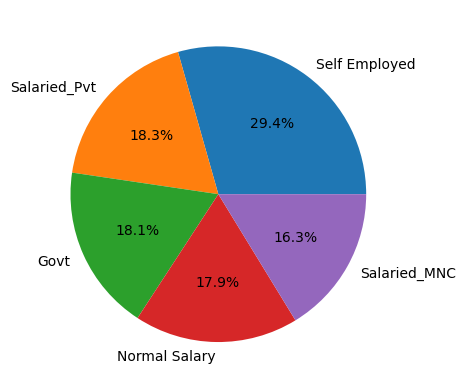

In [9]:
# With this function we can Visually see Segment wise Statistical Summary for Categorical variables.
plt.pie(df['Segment'].value_counts(), labels = df['Segment'].unique(), autopct='%0.1f%%');

In [10]:
# Looking at the shape of the Data Set.
df.shape

(1500, 8)

## Data Mining

1. Extract the month and year from the Date column using appropriate functions. 

In [11]:
df['Month']=df['Date'].dt.month_name()
df['Order_Month']= df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [12]:
df.head()

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid,Month,Order_Month,Year
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75,January,1,2004
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02,January,1,2004
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06,January,1,2004
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12,January,1,2004
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88,January,1,2005


2. Conduct a segment-wise analysis of expenditure and repayment by the customers across the years.

In [13]:
segment_wise_analysis = df.pivot_table(index = ['Year', 'Segment'],values = ['Amount spent','Amount repaid',],aggfunc = "mean")

**Inferences**
 
 Across the years we can see that during the year 2004-05 customer i.e Normal Salary & Salaried_Pvt have paid less then what they had spent, where in 2006 Salaried_PVT customer has paid less then what they have spent.

3. What’s your take on the movement of repayment behaviour of the customers over the years in consideration?

In [14]:
repay_analysis = df.pivot_table(index= ['Year'], values = ['Amount repaid'],aggfunc = 'mean')

In [15]:
repay_analysis

,Amount repaid
Year,
2004,247399.368067
2005,246029.434944
2006,250067.553770


<Axes: xlabel='Year'>

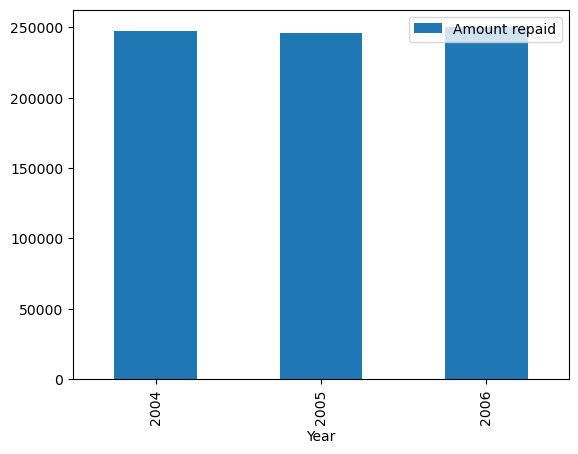

In [16]:
repay_analysis.plot(kind = 'bar')

**Inferences**

They seem to be on the same page

4. What kind of purchase of a good or service has been spend by the customers the most on in the year 2004?

In [17]:
purchase_type_analysis = df[df['Year']==2004].pivot_table(index = ['Type'],columns = ['Year'], values = ['Amount spent'], aggfunc = 'mean')

In [18]:
purchase_type_analysis

,Amount spent
Year,2004
Type,
AIR TICKET,239168.988286
AUTO,279040.440000
BIKE,220155.557500
BUS TICKET,275080.493529
CAMERA,243205.273077
CAR,247000.628571
CLOTHES,245345.212857
FOOD,255914.831250


<Axes: xlabel='Type'>

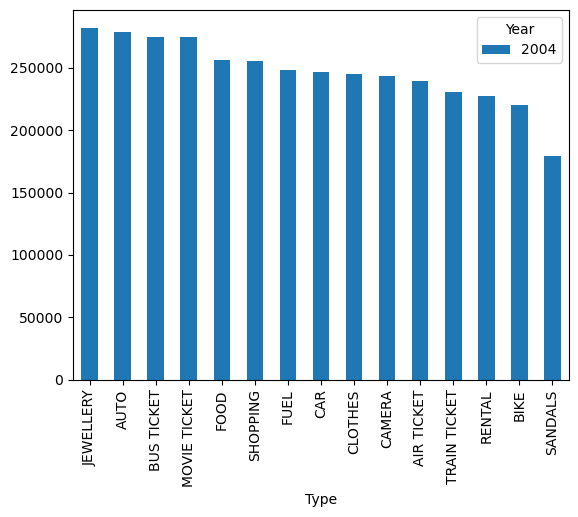

In [19]:
purchase_type_analysis['Amount spent'].sort_values(by = 2004, ascending = False).plot(kind = 'bar')

**Inferences**

It can be seen that JEWELLERY TYPE is the most purchased Goods and Services in 2004

5. What kind of credit card has been used the most on an average to make purchases in the year 2006?

In [20]:
df[df['Year']==2006].groupby('Product')['Amount spent'].mean().sort_values(ascending = False)

Product
Platinum    242931.743010
Silver      240362.735574
Gold        236595.995701
Name: Amount spent, dtype: float64

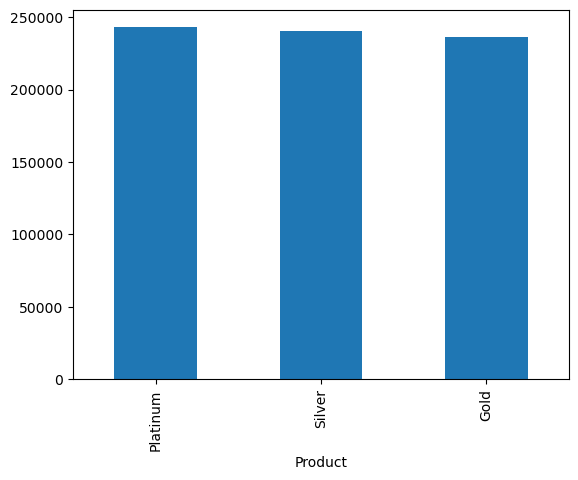

In [21]:
df[df['Year']==2006].groupby('Product')['Amount spent'].mean().sort_values(ascending = False).plot(kind = 'bar');

**Inferences**

Amoung the 3 Credit Card Products, "Platinum" is the most used Credit Card.